<a href="https://colab.research.google.com/github/deepw98/project2/blob/main/exp1.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!cp /content/drive/MyDrive/Train.zip /content/Train.zip

In [4]:
import os
import glob
import cv2
import numpy as np

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
# data_dir = '/content/drive/MyDrive/Test'  # Replace with the actual path

# image_paths = glob.glob(os.path.join(data_dir, '**', '*.jpg'), recursive=True)

In [7]:
import zipfile
import cv2
import numpy as np
import os

zip_path = '/content/Train.zip'  # Path to your zip archive

images = []
labels = []

try:
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        for file_info in zip_ref.infolist(): # Iterate through files in the zip
            if file_info.filename.endswith(('.jpg', '.jpeg', '.png', '.gif')):  # Check if it's an image
                try:
                    with zip_ref.open(file_info) as f: # Open the file-like object
                        image = cv2.imdecode(np.frombuffer(f.read(), np.uint8), cv2.IMREAD_COLOR)
                        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                        image = cv2.resize(image, (224, 224))
                        images.append(image)
                        label = os.path.basename(os.path.dirname(file_info.filename)) # Extract label from path within zip
                        labels.append(label)
                except Exception as e:
                    print(f"Error processing {file_info.filename}: {e}")

    images = np.array(images)
    labels = np.array(labels)

except FileNotFoundError:
    print(f"Error: Zip file not found at {zip_path}")
except zipfile.BadZipFile:
    print(f"Error: Invalid zip file at {zip_path}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")



# Example of how to use the loaded data (optional)
print("Number of images loaded:", len(images))
print("Number of labels loaded:", len(labels))

# Check the shape of the images array (optional)
if len(images) > 0:
    print("Shape of images array:", images.shape)

Number of images loaded: 3200
Number of labels loaded: 3200
Shape of images array: (3200, 224, 224, 3)


In [8]:
# Check if labels were extracted correctly
unique_labels = np.unique(labels)
print(f"Unique labels found: {unique_labels}")

if len(unique_labels) != 2:
    print("Error: Incorrect number of labels detected. Ensure correct folder structure.")
    exit()


Unique labels found: ['Fire' 'No_Fire']


In [9]:
# The version you asked about (encoding unique labels):
le_unique = LabelEncoder()
encoded_unique_labels = le_unique.fit_transform(unique_labels)
print("Encoded Unique Labels:", encoded_unique_labels)

# The correct way to encode ALL labels for a classification task:
le_all = LabelEncoder()
encoded_all_labels = le_all.fit_transform(labels)
print("Encoded All Labels:", encoded_all_labels)

print(f"Loaded {len(images)} images")
print(f"Loaded {len(encoded_all_labels)} labels")

#Inverse transform
original_all_labels= le_all.inverse_transform(encoded_all_labels)
print("Original All Labels:", original_all_labels)


Encoded Unique Labels: [0 1]
Encoded All Labels: [0 0 0 ... 1 1 1]
Loaded 3200 images
Loaded 3200 labels
Original All Labels: ['Fire' 'Fire' 'Fire' ... 'No_Fire' 'No_Fire' 'No_Fire']


In [10]:
import numpy as np

num_fire = np.count_nonzero(encoded_all_labels == 0)
print(f"Number of 'Fire' images: {num_fire}")

num_no_fire = np.count_nonzero(encoded_all_labels == 1)
print(f"Number of 'No_Fire' images: {num_no_fire}")

Number of 'Fire' images: 1600
Number of 'No_Fire' images: 1600


In [11]:
fire_indices = np.where(encoded_all_labels == 0)[0]
fire_images = np.array([images[i] for i in fire_indices])

print(fire_images.shape)

no_fire_indices = np.where(encoded_all_labels == 1)[0]
non_fire_images = np.array([images[i] for i in no_fire_indices]) #If images is list
#no_fire_images = images[no_fire_indices] #If images is numpy array

print(non_fire_images.shape)

(1600, 224, 224, 3)
(1600, 224, 224, 3)


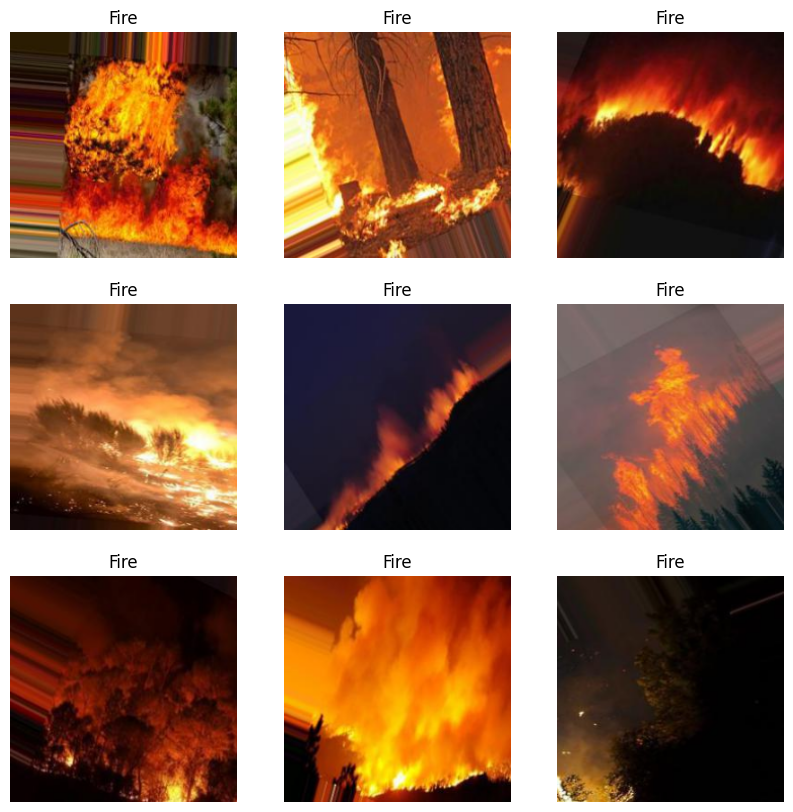

In [12]:
plt.figure(figsize=(10, 10))
for i in range(min(9, len(images))):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title('Fire') #Correct way to get the string label
    plt.axis('off')
plt.show()

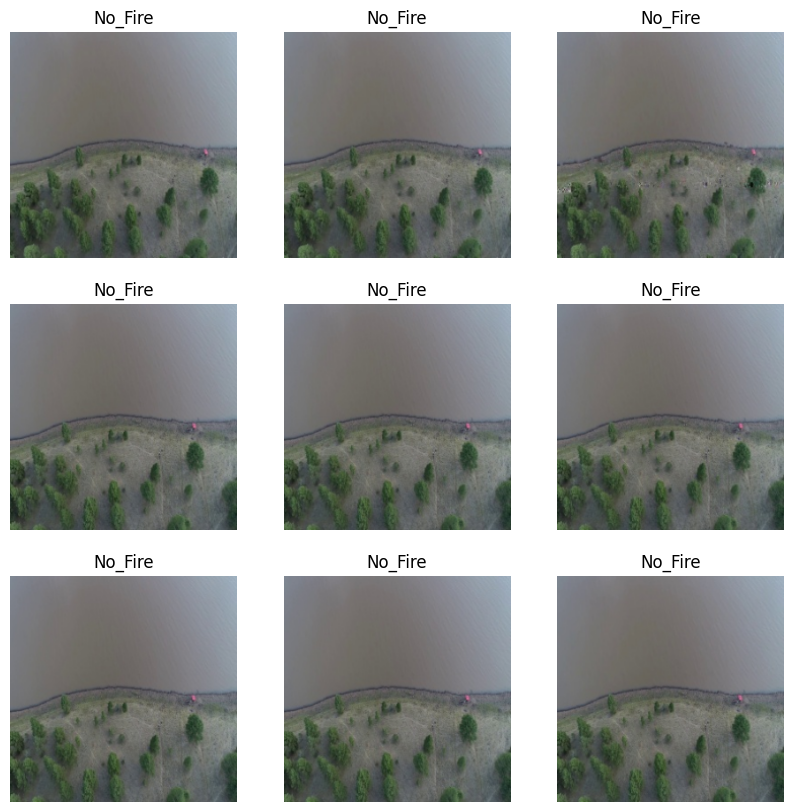

In [13]:
if len(non_fire_images) > 0:
    if len(non_fire_images) == 1:
        plt.figure(figsize=(5, 5))
        plt.imshow(non_fire_images[0])
        plt.title('No_Fire')
        plt.axis('off')
        plt.show()
    else:
        plt.figure(figsize=(10, 10))
        for i in range(min(9, len(non_fire_images))):
            plt.subplot(3, 3, i + 1)
            plt.imshow(non_fire_images[i])
            plt.title('No_Fire')
            plt.axis('off')
        plt.show()
else:
    print("No 'no_fire' images found.")

In [14]:
import zipfile
import os
import random
import cv2
import numpy as np

In [15]:
# def create_pairs_efficient(zip_path, fire_dir_in_zip, non_fire_dir_in_zip, num_negative_pairs=1000, num_positive_pairs=1000):
#     pairs = []
#     labels = []
#     with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#         fire_image_names = [
#             name
#             for name in zip_ref.namelist()
#             if name.startswith(fire_dir_in_zip) and name.lower().endswith(('.jpg', '.png'))
#         ]

#         non_fire_image_names = [
#             name
#             for name in zip_ref.namelist()
#             if name.startswith(non_fire_dir_in_zip) and name.lower().endswith(('.jpg', '.png'))
#         ]

#          # Create positive pairs
#         min_len = min(len(fire_image_names), len(non_fire_image_names))
#         num_positive_pairs = min(num_positive_pairs, min_len) # Ensure we don't try to make more pairs than available

#         positive_indices = random.sample(range(min_len), num_positive_pairs) # Randomly select indices

#         for i in positive_indices:
#             img1_name = fire_image_names[i]
#             img2_name = non_fire_image_names[i]
#             add_pair(zip_path, fire_dir_in_zip, img1_name, non_fire_dir_in_zip, img2_name, 1, created_pairs, pairs, labels)

#         # Create negative pairs
#         for _ in range(num_negative_pairs):
#             # Randomly select fire and non-fire images for negative pairs
#             img1_name = random.choice(fire_image_names)
#             img2_name = random.choice(non_fire_image_names)
#             add_pair(zip_path, fire_dir_in_zip, img1_name, non_fire_dir_in_zip, img2_name, 0, created_pairs, pairs, labels)

#     return pairs, labels

# created_pairs = set() # Use a set for efficient membership checking
# pairs = []
# labels = []

# def add_pair(zip_path, fire_dir_in_zip, img1_name, non_fire_dir_in_zip, img2_name, label, created_pairs, pairs, labels):
#     sorted_pair = tuple(sorted((img1_name, img2_name)))
#     if sorted_pair not in created_pairs:
#         created_pairs.add(sorted_pair)
#         pairs.append((img1_name, img2_name))
#         labels.append(label)

#         img2_path_in_zip = None  # Initialize before the try block
#         img1_path_in_zip = os.path.join(img1_name)
#         # --- Load and process images here (only when needed) ---
#         try: # Add try-except block for handling potential errors
#            with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#             # print(f"Fire directory{fire_dir_in_zip}")
#             # print(f"File name{img1_name}")
#             # print(f"Trying to open: {img1_path_in_zip}")
#             with zip_ref.open(img1_path_in_zip) as f:
#                 img1 = cv2.imdecode(np.frombuffer(f.read(), np.uint8), cv2.IMREAD_COLOR)

#             img2_path_in_zip = os.path.join(img2_name)  # Construct path ONLY ONCE
#             with zip_ref.open(img2_path_in_zip) as f:
#                 img2 = cv2.imdecode(np.frombuffer(f.read(), np.uint8), cv2.IMREAD_COLOR)


#         except Exception as e:  # Catch potential errors during image loading or processing
#             print(f"Error processing pair ({img1_path_in_zip}, {img2_path_in_zip}): {e}")
#             # You might want to handle the error (e.g., skip the pair)
#             return  # Exit the add_pair function early if there's an error


In [16]:
import zipfile
import random
import cv2
import numpy as np

created_pairs = set()

def add_pair(zip_path, img1_name, img2_name, label, pairs, labels):  # Add 'labels' argument
    sorted_pair = tuple(sorted((img1_name, img2_name)))
    if sorted_pair not in created_pairs:
        created_pairs.add(sorted_pair)
        pairs.append((img1_name, img2_name))  # Store image names only in pairs
        labels.append(label)  # Store the label in the labels list

def load_and_process_images(zip_path, pair_with_label):  # Changed argument name
    img1_name, img2_name, label = pair_with_label  # Unpack image names and label
    try:
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            with zip_ref.open(img1_name) as f:
                img1 = cv2.imdecode(np.frombuffer(f.read(), np.uint8), cv2.IMREAD_COLOR)

            with zip_ref.open(img2_name) as f:
                img2 = cv2.imdecode(np.frombuffer(f.read(), np.uint8), cv2.IMREAD_COLOR)

        # ... process img1 and img2 here ...
        return img1, img2, label

    except (KeyError, cv2.error) as e:
        print(f"Error processing pair ({img1_name}, {img2_name}): {e}")
        return None, None, None


def create_pairs_efficient(zip_path, fire_dir_in_zip, non_fire_dir_in_zip, num_negative_pairs=1000, num_positive_pairs=1000):
    pairs = []
    labels = []  # Initialize labels list HERE
    fire_image_names = []
    non_fire_image_names = []

    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
         fire_image_names = [
            name
            for name in zip_ref.namelist()
            if name.startswith(fire_dir_in_zip) and name.lower().endswith(('.jpg', '.png'))
        ]

         non_fire_image_names = [
            name
            for name in zip_ref.namelist()
            if name.startswith(non_fire_dir_in_zip) and name.lower().endswith(('.jpg', '.png'))
        ]

        # a) Fire-Fire Positive Pairs
    num_fire_positive_pairs = min(num_positive_pairs // 2, len(fire_image_names) // 2) # Limit to available pairs
    fire_pair_indices = random.sample(range(len(fire_image_names)), num_fire_positive_pairs * 2) # Get indices for pairs
    for i in range(0, len(fire_pair_indices), 2): # Step by 2 to create pairs
        img1_name = fire_image_names[fire_pair_indices[i]]
        img2_name = fire_image_names[fire_pair_indices[i+1]]
        add_pair(zip_path, img1_name, img2_name, 1, pairs, labels) # Label 1 for positive (similar)

    # b) No-Fire-No-Fire Positive Pairs
    num_nofire_positive_pairs = min(num_positive_pairs - len(pairs), len(non_fire_image_names) // 2) # Remaining positive pairs, limited by available no-fire images
    nofire_pair_indices = random.sample(range(len(non_fire_image_names)), num_nofire_positive_pairs * 2)
    for i in range(0, len(nofire_pair_indices), 2):
        img1_name = non_fire_image_names[nofire_pair_indices[i]]
        img2_name = non_fire_image_names[nofire_pair_indices[i+1]]
        add_pair(zip_path, img1_name, img2_name, 1, pairs, labels) # Label 1 for positive

    # 2. Create Negative Pairs (Fire-No-Fire)
    num_negative_pairs = min(num_negative_pairs, min(len(fire_image_names), len(non_fire_image_names))) # Limit by available pairs
    for _ in range(num_negative_pairs):
        img1_name = random.choice(fire_image_names)
        img2_name = random.choice(non_fire_image_names)
        add_pair(zip_path, img1_name, img2_name, 0, pairs, labels) # Label 0 for negative (dissimilar)

    return pairs, labels  # Return BOTH pairs and labels


In [17]:
fire_dir_in_zip = "Train/Fire"
non_fire_dir_in_zip = "Train/No_Fire"

In [18]:

zip_file_path = "/content/Train.zip"  # Correct path to your zip file
# fire_directory_in_zip = "Test/Fire"  # Path inside the zip
# non_fire_directory_in_zip = "Test/No_Fire"  # Path inside the zip

pairs, labels = create_pairs_efficient(zip_file_path, fire_dir_in_zip, non_fire_dir_in_zip, 1000,1000)

print(f"Number of pairs created: {len(pairs)}")
print(f"Number of labels created: {len(labels)}")

Number of pairs created: 2000
Number of labels created: 2000


# Creating siamese network

In [19]:
import torch
import torch.nn as nn
import torchvision.models as models
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim

# Train_Test_Split

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
# Split data into training and testing sets (e.g., 80% train, 20% test)
train_pairs, test_pairs, train_labels, test_labels = train_test_split(pairs, labels, test_size=0.2, random_state=42)

train_pairs, val_pairs, train_labels, val_labels = train_test_split(
                                  train_pairs, train_labels, test_size= 1/8 , random_state=42  # test_size=0.125 approximately 10% validation
)

print(f"Number of training pairs: {len(train_pairs)}")
print(f"Number of validation pairs: {len(val_pairs)}")
print(f"Number of testing pairs: {len(test_pairs)}")

Number of training pairs: 1400
Number of validation pairs: 200
Number of testing pairs: 400


In [22]:
!ls /content/

drive  sample_data  Train.zip


In [23]:
import zipfile
import os

zip_path = '/content/Train.zip' # Path to your zip file in Colab
extract_path = '/content/'     # Path where you want to extract the contents

if not os.path.exists(extract_path + 'Train'): # Check if 'Test' directory already exists (to avoid re-extracting unnecessarily)
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

print("Train.zip has been extracted to /content/")

# Verify extraction (optional, but good practice)
!ls /content/Train
!ls /content/Train/Fire | head -n 5 # List first 5 files in Fire directory
!ls /content/Train/No_Fire | head -n 5 # List first 5 files in No_Fire directory

Train.zip has been extracted to /content/
Fire  No_Fire
fire_train_1001.jpg
fire_train_1002.jpg
fire_train_1003.jpg
fire_train_1004.jpg
fire_train_1005.jpg
lake_resized_lake_frame0.jpg
lake_resized_lake_frame100.jpg
lake_resized_lake_frame101.jpg
lake_resized_lake_frame102.jpg
lake_resized_lake_frame103.jpg


In [24]:
# from torch.utils.data import Dataset
# from PIL import Image
# import torchvision.transforms as transforms
# import torch
# import os # Import the 'os' module

# class CustomDataset(Dataset):
#     def __init__(self, pairs, labels):
#         self.pairs = pairs
#         self.labels = labels
#         self.transform = transforms.ToTensor()

#     def __len__(self):
#         return len(self.pairs)

#     def __getitem__(self, idx):
#         img1_path, img2_path = self.pairs[idx]
#         label = self.labels[idx]

#         try:
#             img1 = Image.open(img1_path).convert('RGB')
#             img2 = Image.open(img2_path).convert('RGB')
#         except FileNotFoundError as e:
#             print(f"FileNotFoundError: Could not find image at path: {img1_path} or {img2_path}")
#             print(f"  Error details: {e}") # Print more error details
#             return None # Keep returning None for now during debugging


#         img1_tensor = self.transform(img1)
#         img2_tensor = self.transform(img2)
#         label_tensor = torch.tensor(label, dtype=torch.long)

#         return img1_tensor, img2_tensor, label_tensor


# # [3]: # Create Datasets for training, validation, and testing sets
# train_data = CustomDataset(train_pairs, train_labels)
# val_data = CustomDataset(val_pairs, val_labels)
# test_data = CustomDataset(test_pairs, test_labels)

# print(f"Length of training dataset: {len(train_data)}")
# print(f"Length of validation dataset: {len(val_data)}")
# print(f"Length of testing dataset: {len(test_data)}")



In [25]:
from torch.utils.data import Dataset
from PIL import Image
import torchvision.transforms as transforms
import torch
import os

class CustomDataset(Dataset):
    def __init__(self, pairs, labels, augment=False, image_size=(256, 256)): # Added augment parameter and image_size
        self.pairs = pairs
        self.labels = labels
        self.augment = augment # Store augment flag
        self.image_size = image_size # Store image size

        # Define base transforms (ToTensor and Resize)
        base_transforms = [transforms.Resize(image_size), transforms.ToTensor()]

        if augment: # If augment is True, add augmentation transforms
            self.transform = transforms.Compose([
                transforms.RandomResizedCrop(size=image_size, scale=(0.95, 1.0), ratio=(0.95, 1.0)), # Example Augmentation
                transforms.RandomRotation(degrees=10),       # Example Augmentation
                transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1), # Example Augmentation
                transforms.RandomHorizontalFlip(p=0.5),     # Example Augmentation
                transforms.ToTensor()                         # Always convert to tensor at the end
            ])
        else: # If augment is False, only use base transforms (Resize and ToTensor)
            self.transform = transforms.Compose(base_transforms)


    def __len__(self):
        return len(self.pairs)

    def __getitem__(self, idx):
        img1_path, img2_path = self.pairs[idx]
        label = self.labels[idx]


        img1 = Image.open(img1_path).convert('RGB')
        img2 = Image.open(img2_path).convert('RGB')


        # Apply transformations (including augmentation if self.augment is True)
        img1_tensor = self.transform(img1)
        img2_tensor = self.transform(img2)

        label_tensor = torch.tensor(label, dtype=torch.long)

        return img1_tensor, img2_tensor, label_tensor


# [3]: # Create Datasets for training, validation, and testing sets
image_size = (256, 256) # Define your image size
train_data = CustomDataset(train_pairs, train_labels, augment=True, image_size=image_size) # Enable augmentation for training set
val_data = CustomDataset(val_pairs, val_labels, augment=False, image_size=image_size) # No augmentation for validation
test_data = CustomDataset(test_pairs, test_labels, augment=False, image_size=image_size) # No augmentation for testing

In [26]:
batch_size = 16  # Experiment with different batch sizes
num_workers = 2  # Experiment with different num_workers

train_loader = DataLoader(
    train_data,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers,
    pin_memory=True,
    persistent_workers=True  # If PyTorch version >= 1.7
)

val_loader = DataLoader(
    val_data,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers,
    pin_memory=True,
    persistent_workers=True  # If PyTorch version >= 1.7
)

test_loader = DataLoader(
    test_data,
    batch_size=batch_size,
    shuffle=False,
    num_workers=num_workers,
    pin_memory=True,
    persistent_workers=True  # If PyTorch version >= 1.7
)

In [27]:
class SiameseNetwork(nn.Module):
    def __init__(self, embedding_size=128,dropout_rate=0.5):
        super(SiameseNetwork, self).__init__()
        # Load pre-trained ResNet50
        resnet = models.resnet50(pretrained=True)
        self.base_network = nn.Sequential(*list(resnet.children())[:-1])
        self.embedding = nn.Linear(resnet.fc.in_features, embedding_size)
        self.dropout = nn.Dropout(dropout_rate)  # Add dropout layer


    def forward_once(self, x):
        output = self.base_network(x)
        output = output.view(output.size(0), -1)
        output = self.dropout(output)
        output = self.embedding(output)
        output = self.dropout(output)
        return output

    def forward(self, input1, input2):
        output1 = self.forward_once(input1)  # Correct: use input1
        output2 = self.forward_once(input2)  # Correct: use input2
        return output1, output2

In [28]:
# Initialize the network and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net = SiameseNetwork(embedding_size=128).to(device)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 140MB/s]


In [29]:
# Define the Contrastive Loss
def contrastive_loss(output1, output2, label, margin=1.0):
    euclidean_distance = F.pairwise_distance(output1, output2)
    loss_contrastive = torch.mean((1-label) * torch.pow(euclidean_distance, 2) +
                                  (label) * torch.pow(torch.clamp(margin - euclidean_distance, min=0.0), 2))
    return loss_contrastive

In [30]:
for i, (img1, img2, label) in enumerate(train_loader):
    print(f"Batch {i+1}: img1 shape = {img1.shape}, img2 shape = {img2.shape}, label shape = {label.shape}")
    if i > 5:  # Check the first few batches
        break

Batch 1: img1 shape = torch.Size([16, 3, 256, 256]), img2 shape = torch.Size([16, 3, 256, 256]), label shape = torch.Size([16])
Batch 2: img1 shape = torch.Size([16, 3, 256, 256]), img2 shape = torch.Size([16, 3, 256, 256]), label shape = torch.Size([16])
Batch 3: img1 shape = torch.Size([16, 3, 256, 256]), img2 shape = torch.Size([16, 3, 256, 256]), label shape = torch.Size([16])
Batch 4: img1 shape = torch.Size([16, 3, 256, 256]), img2 shape = torch.Size([16, 3, 256, 256]), label shape = torch.Size([16])
Batch 5: img1 shape = torch.Size([16, 3, 256, 256]), img2 shape = torch.Size([16, 3, 256, 256]), label shape = torch.Size([16])
Batch 6: img1 shape = torch.Size([16, 3, 256, 256]), img2 shape = torch.Size([16, 3, 256, 256]), label shape = torch.Size([16])
Batch 7: img1 shape = torch.Size([16, 3, 256, 256]), img2 shape = torch.Size([16, 3, 256, 256]), label shape = torch.Size([16])


In [31]:
import numpy as np

train_labels_np = np.array(train_labels)
val_labels_np = np.array(val_labels)
test_labels_np = np.array(test_labels)

print(f"Train set: Positive pairs = {np.sum(train_labels_np == 1)}, Negative pairs = {np.sum(train_labels_np == 0)}")
print(f"Validation set: Positive pairs = {np.sum(val_labels_np == 1)}, Negative pairs = {np.sum(val_labels_np == 0)}")
print(f"Test set: Positive pairs = {np.sum(test_labels_np == 1)}, Negative pairs = {np.sum(test_labels_np == 0)}")

Train set: Positive pairs = 696, Negative pairs = 704
Validation set: Positive pairs = 105, Negative pairs = 95
Test set: Positive pairs = 199, Negative pairs = 201


In [32]:
import torch.optim as optim
import torchvision.transforms as T

In [33]:
optimizer = optim.AdamW(net.parameters(), lr=0.0002, weight_decay=1e-4)  # Start with a smaller learning rate
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min',factor=0.1, patience=10, verbose=True) # Adjust patience
#scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=15, eta_min=1e-6)

/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


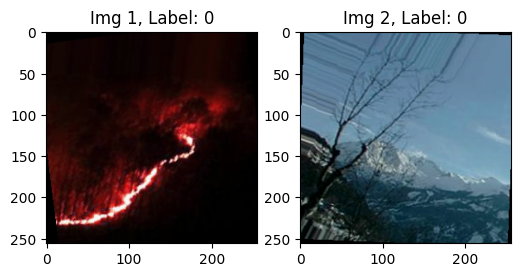

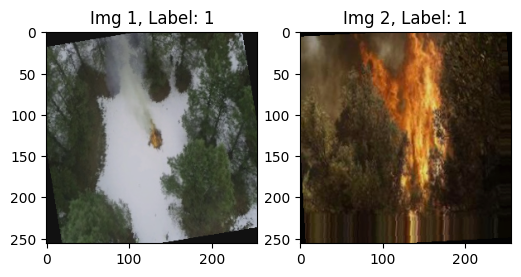

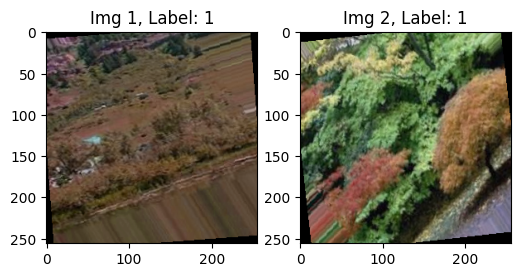

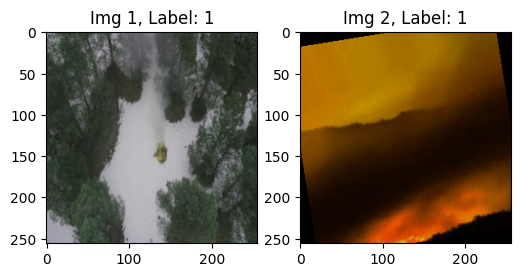

Epoch 1 Average Train Loss: 9.105
Epoch 1 Average Validation Loss: 0.490
Epoch 2 Average Train Loss: 0.715
Epoch 2 Average Validation Loss: 0.501
Epoch 3 Average Train Loss: 0.423
Epoch 3 Average Validation Loss: 0.514
Epoch 4 Average Train Loss: 0.344
Epoch 4 Average Validation Loss: 0.625
Epoch 5 Average Train Loss: 0.297
Epoch 5 Average Validation Loss: 0.487
Epoch 6 Average Train Loss: 0.258
Epoch 6 Average Validation Loss: 0.556
Epoch 7 Average Train Loss: 0.268
Epoch 7 Average Validation Loss: 0.454
Epoch 8 Average Train Loss: 0.192
Epoch 8 Average Validation Loss: 0.734
Epoch 9 Average Train Loss: 0.164
Epoch 9 Average Validation Loss: 0.448
Epoch 10 Average Train Loss: 0.136
Epoch 10 Average Validation Loss: 0.434
Epoch 11 Average Train Loss: 0.121
Epoch 11 Average Validation Loss: 1.010
Epoch 12 Average Train Loss: 0.141
Epoch 12 Average Validation Loss: 0.436
Epoch 13 Average Train Loss: 0.122
Epoch 13 Average Validation Loss: 0.450
Epoch 14 Average Train Loss: 0.102
Epoch 14

In [34]:
num_epochs = 15
scaler = torch.amp.GradScaler(device)  # scaler on the correct device

best_val_loss = float('inf')
patience, counter = 8, 0  # Stop if no improvement for 7 epochs


for epoch in range(num_epochs):
    net.train()
    train_running_loss = 0.0  # Initialize training loss for the epoch

    if epoch == 0: # Visualize only in the first epoch to avoid too much output
        for viz_batch_idx, (viz_img1_batch, viz_img2_batch, viz_label_batch) in enumerate(train_loader):
            if viz_batch_idx < 2: # Visualize first 2 batches
                for i in range(min(4, viz_img1_batch.size(0))): # Visualize first 4 pairs in the batch
                    img1_viz = viz_img1_batch[i].permute(1, 2, 0).cpu().numpy() # CHW to HWC for display
                    img2_viz = viz_img2_batch[i].permute(1, 2, 0).cpu().numpy()
                    label_viz = viz_label_batch[i].item()

                    plt.figure(figsize=(6, 3))
                    plt.subplot(1, 2, 1)
                    plt.imshow(img1_viz)
                    plt.title(f"Img 1, Label: {label_viz}")
                    plt.subplot(1, 2, 2)
                    plt.imshow(img2_viz)
                    plt.title(f"Img 2, Label: {label_viz}")
                    plt.show()
            break # Only visualize first 2 batches of the first epoch
    # --- End Visualization ---


    for batch_idx, (img1_batch, img2_batch, label_batch) in enumerate(train_loader):
        # img1_batch = img1_batch.permute(0, 3, 1, 2)  # Permute to (batch_size, channels, height, width)
        # img2_batch = img2_batch.permute(0, 3, 1, 2)

        img1_batch = img1_batch.to(device, non_blocking=True)  # Move to device
        img2_batch = img2_batch.to(device, non_blocking=True)
        label_batch = label_batch.to(device, non_blocking=True)


        optimizer.zero_grad(set_to_none=True)
        with torch.amp.autocast(device_type='cuda', enabled=True):
            output1, output2 = net(img1_batch, img2_batch)
            loss = contrastive_loss(output1, output2, label_batch)

        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        train_running_loss += loss.item()  # Accumulate training loss *across batches*

        if batch_idx % 100 == 99:
            print(f"Epoch: {epoch+1}, Batch: {batch_idx+1}, Train Loss: {train_running_loss / 100:.3f}")  # Print batch training loss

    epoch_train_loss = train_running_loss / len(train_loader)  # Average training loss for the epoch
    print(f"Epoch {epoch+1} Average Train Loss: {epoch_train_loss:.3f}")

    net.eval()
    val_running_loss = 0.0
    with torch.no_grad():
        for batch_idx, (img1_batch, img2_batch, label_batch) in enumerate(val_loader):
            #  img1_batch = img1_batch.permute(0, 3, 1, 2)  # Permute to (batch_size, channels, height, width)
            #  img2_batch = img2_batch.permute(0, 3, 1, 2)

             img1_batch = img1_batch.to(device, non_blocking=True)  # Move to device
             img2_batch = img2_batch.to(device, non_blocking=True)
             label_batch = label_batch.to(device, non_blocking=True)


             with torch.amp.autocast(device_type='cuda', enabled=True):
               output1, output2 = net(img1_batch, img2_batch)
               loss = contrastive_loss(output1, output2, label_batch)


             val_running_loss += loss.item()

        epoch_val_loss = val_running_loss / len(val_loader)
        print(f"Epoch {epoch+1} Average Validation Loss: {epoch_val_loss:.3f}")
        if epoch_val_loss < best_val_loss:
          best_val_loss = epoch_val_loss
          counter = 0  # Reset counter if improvement
        else:
          counter += 1  # No improvement, increase counter
          if counter >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break

    scheduler.step(epoch_val_loss)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F  # for distance calculation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

# --- (Assuming your SiameseNetwork class definition is already in your notebook or imported) ---
# --- (Assuming your 'test_loader' DataLoader is already defined and ready to use) ---
# --- (Assuming your trained model 'net' is already available in this session) ---

def evaluate_siamese_network_simple(model, test_dataloader, device, threshold=None):
    """
    Simplified evaluation of a Siamese network model on a test dataset,
    assuming model is already trained and in memory.

    Args:
        model (nn.Module): Trained Siamese network model (already in memory).
        test_dataloader (DataLoader): DataLoader for the test dataset.
        device (torch.device): Device to use (CPU or CUDA).
        threshold (float, optional): Distance threshold for classification.

    Returns:
        dict: Dictionary of evaluation metrics.
    """
    model.eval()  # Set model to evaluation mode
    all_predicted_labels = []
    all_true_labels = []
    all_distances = []

    with torch.no_grad():  # Disable gradient calculations
        for batch_idx, (img_pair1, img_pair2, labels) in enumerate(test_dataloader):
            img_pair1, img_pair2, labels = img_pair1.to(device), img_pair2.to(device), labels.to(device)

            embedding1, embedding2 = model(img_pair1, img_pair2)
            distances = F.pairwise_distance(embedding1, embedding2)

            all_distances.extend(distances.cpu().numpy())
            all_true_labels.extend(labels.cpu().numpy())

    # --- Determine predictions based on threshold ---
    if threshold is None:
        raise ValueError("Threshold must be provided for evaluation.")

    predicted_labels = [1 if distance.item() < threshold else 0 for distance in all_distances]

    # --- Calculate Evaluation Metrics ---
    accuracy = accuracy_score(all_true_labels, predicted_labels)
    precision = precision_score(all_true_labels, predicted_labels)
    recall = recall_score(all_true_labels, predicted_labels)
    f1 = f1_score(all_true_labels, predicted_labels)
    auc = roc_auc_score(all_true_labels, all_distances)

    evaluation_metrics = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "auc": auc
    }

    print("\n--- Evaluation Metrics on Test Set (Simplified) ---")
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-Score:  {f1:.4f}")
    print(f"AUC:       {auc:.4f}")

    return evaluation_metrics

# --- Example Usage (Run this *after* your training loop in the same Colab session) ---
if __name__ == '__main__':
    # --- Assuming 'net' is your *already trained* SiameseNetwork model ---
    # --- and 'test_loader' is your *already defined* test DataLoader ---

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    net = net.to(device) # Make sure your trained model is on the correct device (GPU or CPU)

    # --- Set your Distance Threshold ---
    distance_threshold = 1.0  # **Replace with your determined threshold value if you have one. Otherwise, use a placeholder like 1.0 and you might need to adjust later**

    # --- Run Evaluation (using the *simple* evaluation function) ---
    test_metrics_simple = evaluate_siamese_network_simple(net, test_loader, device, threshold=distance_threshold)

    # --- Access and Use Metrics (optional) ---
    # print(test_metrics_simple)

In [38]:
save_path_local = 'siamese_fire_model.pth'  # Saves to the current working directory in Colab's local filesystem

torch.save(net.state_dict(), save_path_local)
print(f"Model weights saved to local path: {save_path_local}")

# After this, check the Files pane in Colab (left sidebar) to see if 'siamese_fire_model.pth' is created.

Model weights saved to local path: siamese_fire_model.pth


In [40]:
save_path = '/content/drive/MyDrive/siamese_fire_model.pth'  # Example filename with .pth extension (PyTorch convention)

# --- Save the model's state_dict ---
torch.save(net.state_dict(), save_path)

print(f"Model weights saved to: {save_path}")

Model weights saved to: /content/drive/MyDrive/siamese_fire_model.pth


In [3]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np  # For NumPy array handling

def evaluate_siamese_network(model, test_dataloader, device, threshold=None):

    net.eval()  # Set model to evaluation mode
    all_predicted_labels = []
    all_true_labels = []
    all_distances = []

    with torch.no_grad():  # Disable gradient calculations during evaluation
        for batch_idx, (img_pair1, img_pair2, labels) in enumerate(test_dataloader):
            img_pair1, img_pair2, labels = img_pair1.to(device), img_pair2.to(device), labels.to(device)

            embedding1, embedding2 = model(img_pair1, img_pair2)
            distances = F.pairwise_distance(embedding1, embedding2) # Calculate distance between embeddings

            all_distances.extend(distances.cpu().numpy()) # Store distances
            all_true_labels.extend(labels.cpu().numpy())     # Store true labels


    # --- Determine predictions based on threshold ---
    if threshold is None:
        raise ValueError("Threshold must be provided for evaluation (or determined from validation).")

    predicted_labels = [1 if distance.item() < threshold else 0 for distance in all_distances] # 1 for similar (fire), 0 for dissimilar (no-fire)


    # --- Calculate Evaluation Metrics ---
    accuracy = accuracy_score(all_true_labels, predicted_labels)
    precision = precision_score(all_true_labels, predicted_labels)
    recall = recall_score(all_true_labels, predicted_labels)
    f1 = f1_score(all_true_labels, predicted_labels)
    auc = roc_auc_score(all_true_labels, all_distances) # AUC needs distances, not binary predictions


    evaluation_metrics = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "auc": auc
    }

    print("\n--- Evaluation Metrics on Test Set ---")
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-Score:  {f1:.4f}")
    print(f"AUC:       {auc:.4f}")

    return evaluation_metrics

In [5]:
!cp /content/drive/MyDrive/copy_of_exp1.py /content/exp1.py

In [6]:
from .models.exp1 import SiameseNetwork # If 'models' is a directory
# OR (if 'exp1.py' is directly inside the current directory)
from .exp1 import SiameseNetwork # If 'exp1.py' is in the same directory as the current script

ImportError: attempted relative import with no known parent package

In [4]:
import torch
from exp1 import SiameseNetwork  # Assuming your model class is in 'your_model_definition_file.py'

if __name__ == '__main__':
    # --- 1. Load your trained Siamese Network Model ---
    # Assuming your model class is 'SiameseNetwork' and you have a saved checkpoint 'siamese_fire_model.pth'
    your_model_definition_file ='/content/drive/MyDrive/copy_of_exp1.py'

   # from your_model_definition_file import SiameseNetwork  # Replace 'your_model_definition_file'
    net = SiameseNetwork(embedding_size=128,dropout_rate=0.5) # Initialize your model with correct parameters (embedding_size, etc.)
    checkpoint_path = '/content/drive/MyDrive/siamese_fire_model.pth' # Path to your saved model weights
    net.load_state_dict(torch.load(checkpoint_path))
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    net = net.to(device)

    # --- 2. Load your Test DataLoader ---
    # Assuming you have a function to create your test dataloader, e.g., 'create_test_dataloader'
  #  from your_data_loading_file import create_test_dataloader  # Replace 'your_data_loading_file'
  #  test_dataloader = create_test_dataloader(test_pairs_list, test_labels_list, batch_size=64) # Replace with your actual test data lists and batch size


    # --- 3. Set your Distance Threshold ---
    # **IMPORTANT:** You need to determine an appropriate threshold.
    # You might have found this on your validation set during training.
    distance_threshold = 1.0 # **Replace with your determined threshold value**


    # --- 4. Run Evaluation ---
    test_metrics = evaluate_siamese_network(net, test_loader, device, threshold=distance_threshold)

    # --- 5. Access and Use Evaluation Metrics (optional) ---
    # print(test_metrics) # If you want to access the dictionary programmatically
    # e.g., test_accuracy = test_metrics['accuracy']

NameError: name 'SiameseNetwork' is not defined